In [51]:
%pip install seaborn pandas matplotlib scikit-learn scipy

Note: you may need to restart the kernel to use updated packages.


In [52]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import scipy.stats as st
from scipy.stats import pearsonr
import pprint

In [53]:
# Carregar o dataset Iris usando seaborn. Nesse caso, o dataset já é formatado como pandas DataFrame
df_iris = sns.load_dataset('iris')
display(df_iris)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
# Renomeia as colunas do Datframe para português.
# O nome das colunas sempre fica armazenado na propriedade 'columns' do DataFrame. Aqui, apenas substituímos os nomes de acordo com sua posição na lista
# Ou seja, só podemos fazer isso porque sabemos exatamente a ordem das colunas originais e atuais no DataFrame
df_iris.columns = ['comprimento_sepala', 'largura_sepala', 'comprimento_petala', 'largura_petala', 'especies']

# Criar um novo DataFrame apenas com as propriedades numéricas (para facilitar as análises mais a frente)
df_propriedades = df_iris.drop(columns = ['especies'])

In [66]:
# Para vermos como ficaram ambos DataFrames
display(df_iris.head())
display(df_propriedades.head())

,comprimento_sepala,largura_sepala,comprimento_petala,largura_petala,especies
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


,comprimento_sepala,largura_sepala,comprimento_petala,largura_petala
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [67]:
# 1. Tabelas resumo separadas por espécie
print("Tabelas Resumo por Espécie:\n")

# Loop for que itera sobre a coluna 'especies' do DataFrame df_iris e destaca apenas as ocorrências únicas
# Para cada especie única na coluna 'especies' do DataFrame 'df_iris':
for especie in df_iris['especies'].unique():

  # Exibe a frase "Espécie: espécie com a primeira letra maiúscula"
  print(f"\nEspécie: {especie.capitalize()}")

  # Ou, de uma forma mais compacta...
  display(df_iris[df_iris['especies'] == especie].describe())

Tabelas Resumo por Espécie:


Espécie: Setosa


,comprimento_sepala,largura_sepala,comprimento_petala,largura_petala
count,50.00000,50.000000,50.000000,50.000000
mean,5.00600,3.428000,1.462000,0.246000
std,0.35249,0.379064,0.173664,0.105386
min,4.30000,2.300000,1.000000,0.100000
25%,4.80000,3.200000,1.400000,0.200000
50%,5.00000,3.400000,1.500000,0.200000
75%,5.20000,3.675000,1.575000,0.300000
max,5.80000,4.400000,1.900000,0.600000



Espécie: Versicolor


,comprimento_sepala,largura_sepala,comprimento_petala,largura_petala
count,50.000000,50.000000,50.000000,50.000000
mean,5.936000,2.770000,4.260000,1.326000
std,0.516171,0.313798,0.469911,0.197753
min,4.900000,2.000000,3.000000,1.000000
25%,5.600000,2.525000,4.000000,1.200000
50%,5.900000,2.800000,4.350000,1.300000
75%,6.300000,3.000000,4.600000,1.500000
max,7.000000,3.400000,5.100000,1.800000



Espécie: Virginica


,comprimento_sepala,largura_sepala,comprimento_petala,largura_petala
count,50.00000,50.000000,50.000000,50.00000
mean,6.58800,2.974000,5.552000,2.02600
std,0.63588,0.322497,0.551895,0.27465
min,4.90000,2.200000,4.500000,1.40000
25%,6.22500,2.800000,5.100000,1.80000
50%,6.50000,3.000000,5.550000,2.00000
75%,6.90000,3.175000,5.875000,2.30000
max,7.90000,3.800000,6.900000,2.50000


In [68]:
# Cálculo da média e meoda para cada propriedade numérica no DataFrame df_propriedades
display(df_propriedades.median())
display(df_propriedades.mode())

comprimento_sepala    5.80
largura_sepala        3.00
comprimento_petala    4.35
largura_petala        1.30
dtype: float64

,comprimento_sepala,largura_sepala,comprimento_petala,largura_petala
0,5.0,3.0,1.4,0.2
1,NaN,NaN,1.5,NaN


In [79]:
# Intervalos interquartis (IQR)

iqrs = []

for propriedade in df_propriedades.columns:
    q1 = df_propriedades[propriedade].quantile(0.25)
    q2 = df_propriedades[propriedade].quantile(0.50)
    q3 = df_propriedades[propriedade].quantile(0.75)
    iqrs.append(round(q3 - q1, 3))
    print(f"Intervalo interquartil da {propriedade}: {float(iqrs[-1])}\n")

Intervalo interquartil da comprimento_sepala: 1.3

Intervalo interquartil da largura_sepala: 0.5

Intervalo interquartil da comprimento_petala: 3.5

Intervalo interquartil da largura_petala: 1.5



C:\Users\jrica\AppData\Local\Temp\ipykernel_5268\4265288345.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'especies', y = propriedade, data = df_iris, palette = 'Set2', hue = None)


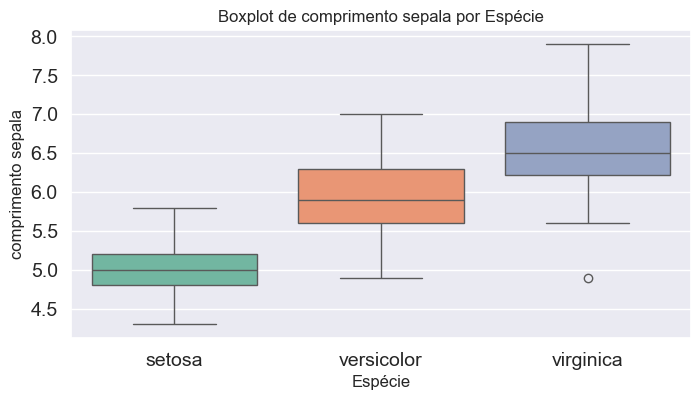

C:\Users\jrica\AppData\Local\Temp\ipykernel_5268\4265288345.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'especies', y = propriedade, data = df_iris, palette = 'Set2', hue = None)


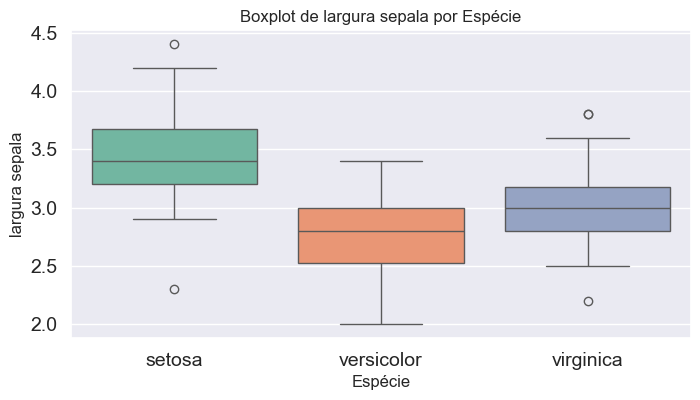

C:\Users\jrica\AppData\Local\Temp\ipykernel_5268\4265288345.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'especies', y = propriedade, data = df_iris, palette = 'Set2', hue = None)


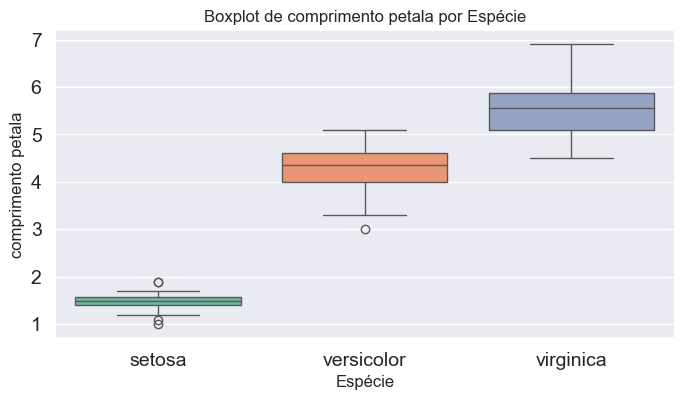

C:\Users\jrica\AppData\Local\Temp\ipykernel_5268\4265288345.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'especies', y = propriedade, data = df_iris, palette = 'Set2', hue = None)


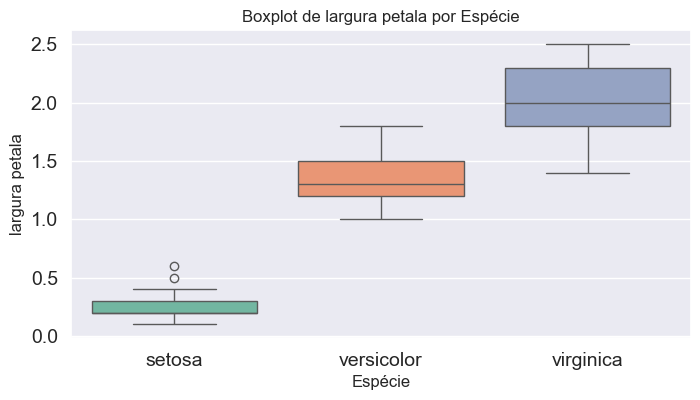

In [73]:
# Boxplots das variáveis por espécie

# Configurar o estilo dos gráficos
sns.set(style="darkgrid")


# Criar os boxplots
for propriedade in df_propriedades.columns:
  plt.figure(figsize=(8, 4))
  sns.boxplot(x = 'especies', y = propriedade, data = df_iris, palette = 'Set2', hue = None)
  plt.title(f'Boxplot de {(propriedade).replace("_", " ")} por Espécie')
  plt.xlabel('Espécie')
  plt.ylabel(f"{(propriedade).replace("_", " ")}")
  plt.xticks(fontsize = 14)
  plt.yticks(fontsize = 14)
  plt.show(True)

array([[<Axes: title={'center': 'comprimento_sepala'}>,
        <Axes: title={'center': 'largura_sepala'}>],
       [<Axes: title={'center': 'comprimento_petala'}>,
        <Axes: title={'center': 'largura_petala'}>]], dtype=object)

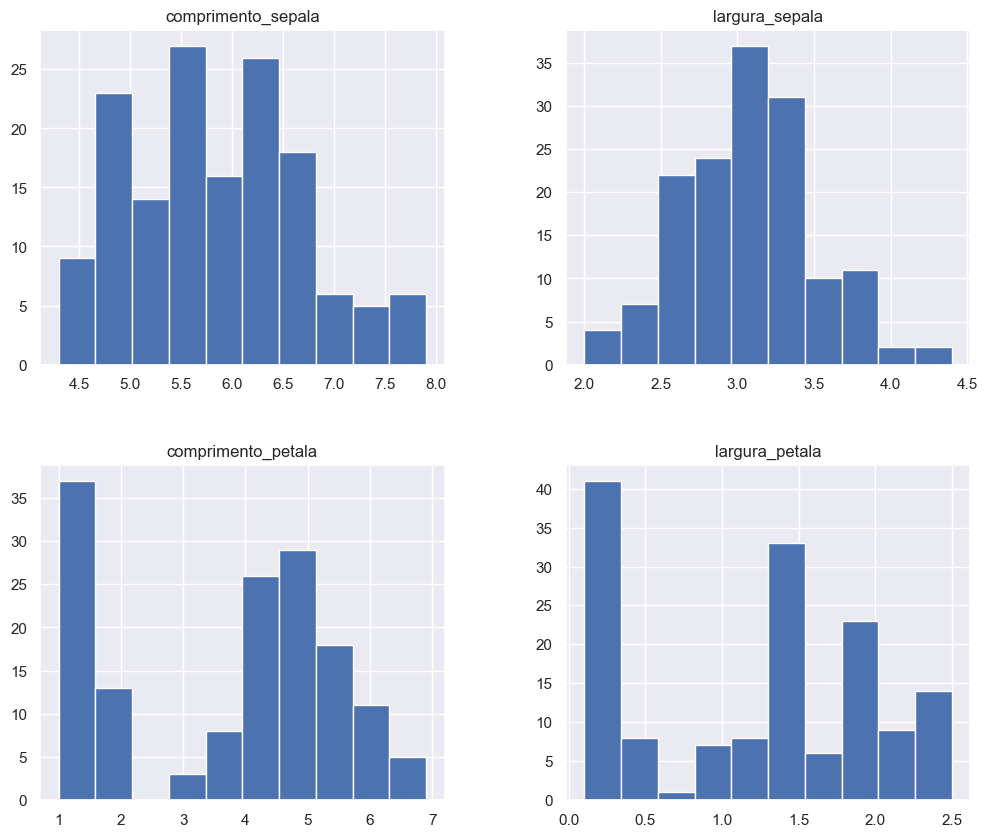

In [ ]:
# Construindo histogramas para cada propriedade numérica no DataFrame df_propriedades
df_propriedades.hist(figsize = (12, 10))


In [76]:
x = np.array(df_iris[df_propriedades.columns])

scaler = MinMaxScaler(feature_range = (0, 1))

x_norm = scaler.fit_transform(x)

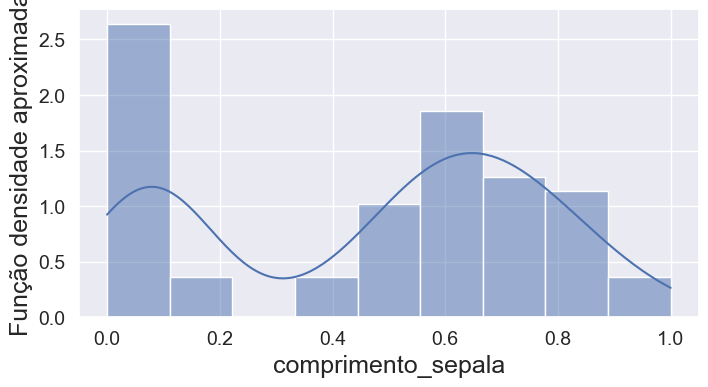

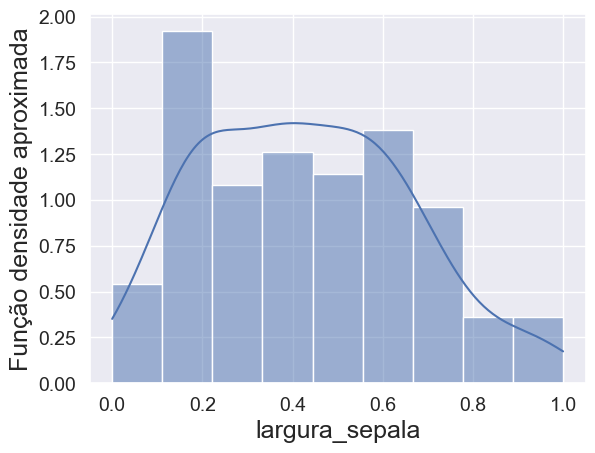

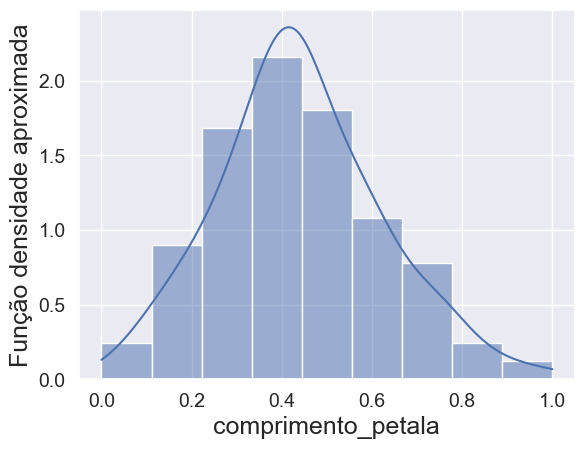

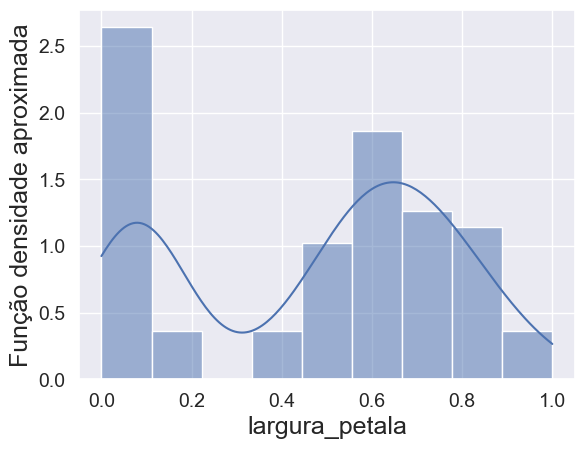

In [ ]:
# COnstruindo gráficos de densidade de probabilidades (KDE) para cada propriedade numérica no DataFrame df_propriedades

plt.figure(figsize = (8, 4))

for i, propriedade in enumerate(df_propriedades.columns):
    # Usando histplot com a linha de densidade (kde=True)
    sns.histplot(x_norm[:, i-1], bins="sturges", kde=True, stat="density")
    plt.xlabel(f"{propriedade}", fontsize = 18)
    plt.ylabel("Função densidade aproximada", fontsize = 18)
    plt.xticks(fontsize = 14)
    plt.yticks(fontsize = 14)
    plt.show(True)

In [77]:
plt.figure(figsize = (10, 8))

for i, propriedade in enumerate(df_propriedades.columns):
    # fill=True preenche a área abaixo da curva (opcional, fica bonito)
    sns.kdeplot(x_norm.iloc[:, i], fill = True, label = propriedade)

plt.title("Distribuição de Densidade (Todas as Variáveis)")
plt.xlabel("Valor Normalizado")
plt.ylabel("Densidade")

plt.legend() 

plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

<Figure size 1000x800 with 0 Axes>

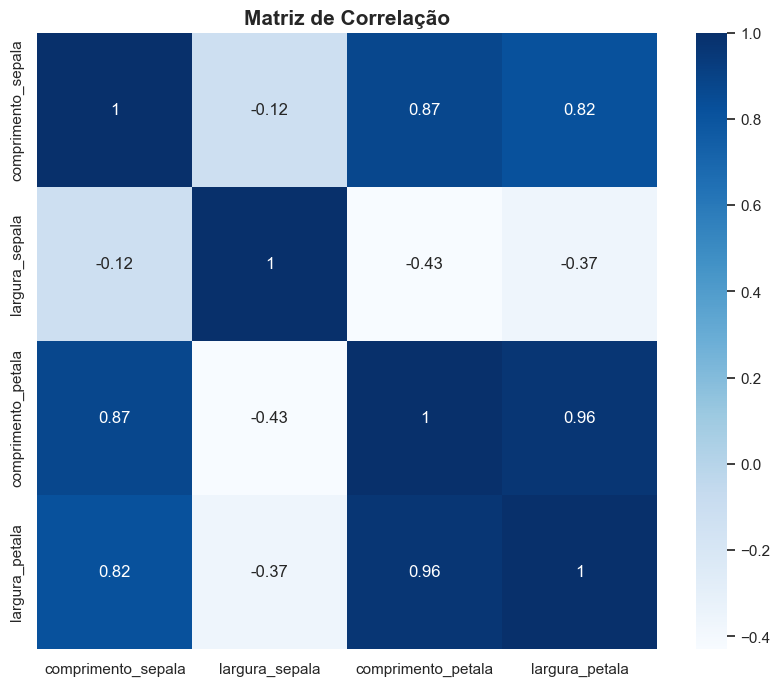

In [ ]:
plt.figure(figsize=(10, 8))

# annot=True escreve o valor da correlação dentro do quadrado
sns.heatmap(df_iris.corr(numeric_only = True), annot=True, cmap="Blues")

plt.title("Matriz de Correlação", fontsize=15, fontweight="bold")
plt.show()

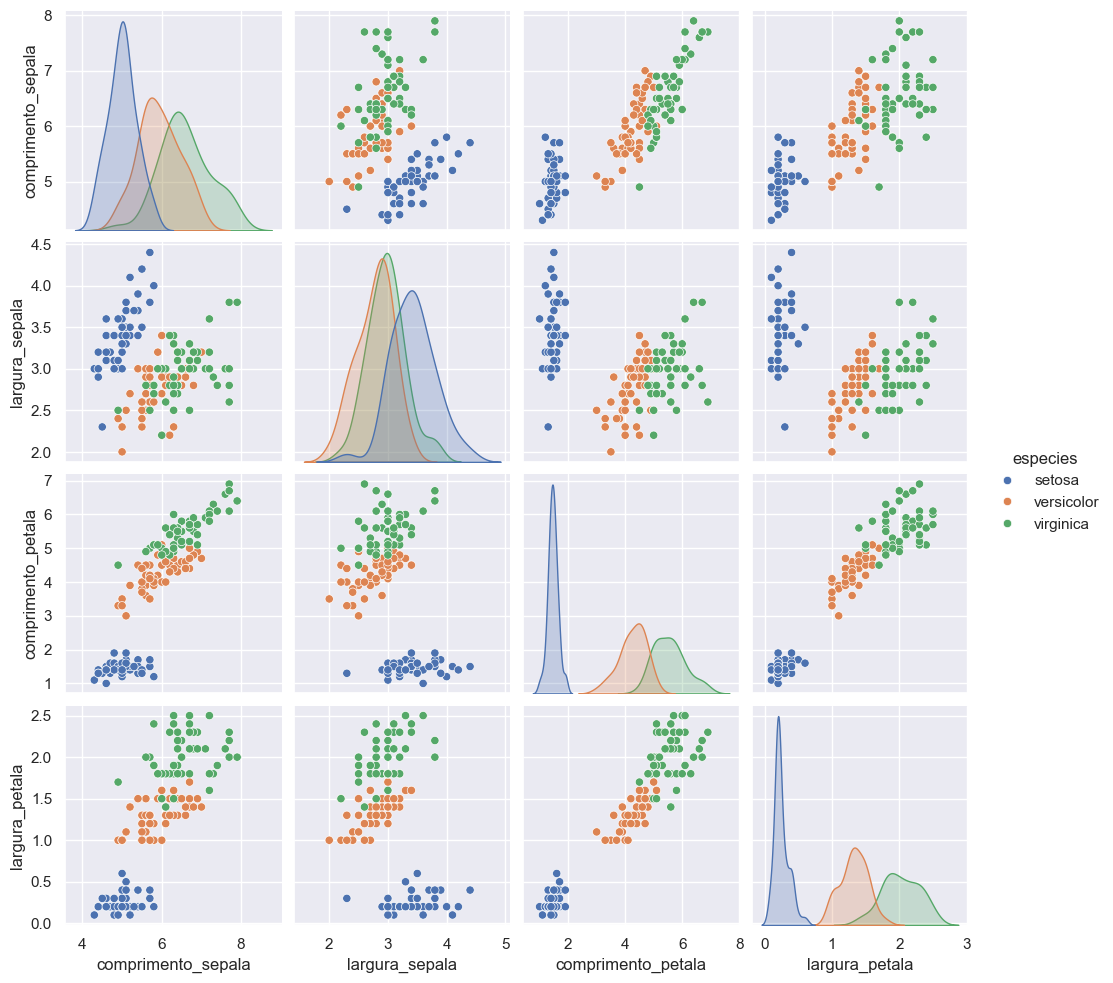

In [ ]:
x2 = sns.pairplot(df_iris, hue = "especies")

In [ ]:
# Carregamento dos dados de entrada (X) e saída (Y)
X = df_propriedades[["comprimento_sepala", "largura_sepala"]]
Y = df_propriedades["comprimento_petala"]

# Divisão dos dados em conjunto de treino e teste
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

#Treinamento do modelo
modelo = LinearRegression()
modelo.fit(X_train, Y_train)

# Fazer previsões
Y_pred = modelo.predict(X_test)

# Cálculo do erro quadrático médio, ou seja, avaliação do modelo
mse = mean_squared_error(Y_test, Y_pred)
print(f"Erro quadrático médio (MSE): {mse}")

Erro quadrático médio (MSE): 0.3524875409620242


In [ ]:
# 1. Carregar e Preparar
data = load_iris()
X = data.data
y = data.target

# Escalonamento (Crucial para K-Means e Regressão Logística)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- A. REGRESSÃO LOGÍSTICA ---
# Divisão 70% treino / 30% teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Treinamento
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Avaliação
y_pred = log_reg.predict(X_test)
print("Acurácia Regressão Logística:", accuracy_score(y_test, y_pred))

# Plot Matriz de Confusão
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', 
            xticklabels=data.target_names, yticklabels=data.target_names)
plt.title('Regressão Logística: Matriz de Confusão')


# --- B. CLUSTERING (K-MEANS) ---
# Agrupamento (assumindo k=3)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(X_scaled)

# Adicionar cluster ao DataFrame para plotagem
df_plot = pd.DataFrame(X, columns=data.feature_names)
df_plot['cluster'] = kmeans.labels_

# Visualização dos Clusters (Pétala)
plt.subplot(1, 2, 2)
sns.scatterplot(data=df_plot, x='petal length (cm)', y='petal width (cm)', 
                hue='cluster', palette='viridis', s=100)
plt.title('K-Means Clustering (k=3)')
plt.show()

In [ ]:
# Escalonamento (Crucial para K-Means e Regressão Logística)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- A. REGRESSÃO LOGÍSTICA ---
# Divisão 70% treino / 30% teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Treinamento
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Avaliação
y_pred = log_reg.predict(X_test)
print("Acurácia Regressão Logística:", accuracy_score(y_test, y_pred))

# Plot Matriz de Confusão
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', 
            xticklabels=data.target_names, yticklabels=data.target_names)
plt.title('Regressão Logística: Matriz de Confusão')


# --- B. CLUSTERING (K-MEANS) ---
# Agrupamento (assumindo k=3)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(X_scaled)

# Adicionar cluster ao DataFrame para plotagem
df_plot = pd.DataFrame(X, columns=data.feature_names)
df_plot['cluster'] = kmeans.labels_

# Visualização dos Clusters (Pétala)
plt.subplot(1, 2, 2)
sns.scatterplot(data=df_plot, x='petal length (cm)', y='petal width (cm)', 
                hue='cluster', palette='viridis', s=100)
plt.title('K-Means Clustering (k=3)')
plt.show()